In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix

import numpy as np
import itertools
import matplotlib.pyplot as plt

In [2]:
def get_all_data():
    root = "sentiment_analysis_data/"

    with open(root + "imdb_labelled.txt", "r") as text_file:
        data = text_file.read().split('\n')
         
    with open(root + "amazon_cells_labelled.txt", "r") as text_file:
        data += text_file.read().split('\n')

    with open(root + "yelp_labelled.txt", "r") as text_file:
        data += text_file.read().split('\n')

    return data

In [3]:
def preprocessing_data(data):
    processing_data = []
    for single_data in data:
        if len(single_data.split("\t")) == 2 and single_data.split("\t")[1] != "":
            processing_data.append(single_data.split("\t"))

    return processing_data

In [4]:
def split_data(data):
    total = len(data)
    training_ratio = 0.75
    training_data = []
    evaluation_data = []

    for indice in range(0, total):
        if indice < total * training_ratio:
            training_data.append(data[indice])
        else:
            evaluation_data.append(data[indice])

    return training_data, evaluation_data

In [5]:
def preprocessing_step():
    data = get_all_data()
    processing_data = preprocessing_data(data)

    return split_data(processing_data)

In [6]:
def training_step(data, vectorizer):
    training_text = [data[0] for data in data]
    training_result = [data[1] for data in data]

    training_text = vectorizer.fit_transform(training_text)

    return BernoulliNB().fit(training_text, training_result)

In [7]:
training_data, evaluation_data = preprocessing_step()

vectorizer = CountVectorizer(binary = 'true')
classifier = training_step(training_data, vectorizer)


In [8]:
result = classifier.predict(vectorizer.transform(["This school is so amazing and feels like home! It's exactly what I envisioned and I couldn't picture myself anywhere else."]))

result[0]

'1'

In [10]:
def analyse_text(classifier, vectorizer, text):
    return text, classifier.predict(vectorizer.transform([text]))
  
def print_result(result):
    text, analysis_result = result
    print_text = "Positive" if analysis_result[0] == '1' else "Negative"
    print(text, ":", print_text)

In [11]:
def simple_evaluation(evaluation_data):
    evaluation_text     = [evaluation_data[0] for evaluation_data in evaluation_data]
    evaluation_result   = [evaluation_data[1] for evaluation_data in evaluation_data]

    total = len(evaluation_text)
    corrects = 0
    for index in range(0, total):
        analysis_result = analyse_text(classifier, vectorizer, evaluation_text[index])
        text, result = analysis_result
        corrects += 1 if result[0] == evaluation_result[index] else 0

    return corrects * 100 / total

In [12]:
simple_evaluation(evaluation_data)

82.0

In [13]:
def create_confusion_matrix(evaluation_data):
    evaluation_text     = [evaluation_data[0] for evaluation_data in evaluation_data]
    actual_result       = [evaluation_data[1] for evaluation_data in evaluation_data]
    prediction_result   = []
    for text in evaluation_text:
        analysis_result = analyse_text(classifier, vectorizer, text)
        prediction_result.append(analysis_result[1][0])
    
    matrix = confusion_matrix(actual_result, prediction_result)
    return matrix

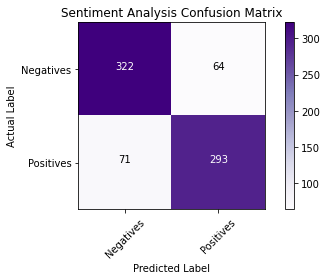

In [14]:
confusion_matrix_result = create_confusion_matrix(evaluation_data)

classes = ["Negatives", "Positives"]

plt.figure()
plt.imshow(confusion_matrix_result, interpolation='nearest', cmap=plt.cm.Purples)
plt.title("Sentiment Analysis Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

text_format = 'd'
thresh = confusion_matrix_result.max() / 2.
for row, column in itertools.product(range(confusion_matrix_result.shape[0]), range(confusion_matrix_result.shape[1])):
    plt.text(column, row, format(confusion_matrix_result[row, column], text_format),
             horizontalalignment="center",
             color="white" if confusion_matrix_result[row, column] > thresh else "black")

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()

plt.show()


In [15]:
# saving the model using pickle 
import pickle
with open('sentiment_model', 'wb') as file:
    pickle.dump(classifier,file)

In [16]:
with open('sentiment_model', 'rb') as file:
    loaded_model = pickle.load(file)

In [17]:
result = loaded_model.predict(vectorizer.transform(["Haven't graduated my Master's program yet, but I will be honest, I am not impressed with NYU at all. It really breaks my heart because I was so excited to go here. Overpriced, feels like staff don't care, it's a struggle to access work study jobs and funds after approval, scholarships are impossible to get no matter how many you apply to, etc."]))

print(result)

['0']


In [18]:
# reading university reviews
import pandas as pd 


In [19]:
uni_reviews = pd.read_csv('reviews.csv', header = 0, encoding = 'cp1252')
uni_reviews.head()

,Order,Happiness,Review,University
0,1,5,Great University,Columbia University
1,2,4,"Columbia is a prestigious, well-placed school....",Columbia University
2,3,1,"Columbia is a well known ivy, but to be honest...",Columbia University
3,4,1,This is a terrible institution with terrible l...,Columbia University
4,5,5,Love it,Columbia University


In [20]:
data = uni_reviews.loc[uni_reviews['University'] == 'New York University']
all_reviews = data['Review'].tolist()

print(len(all_reviews))

26


In [21]:
count_positive = 0
count_all = len(all_reviews)
for review in all_reviews:
    result = loaded_model.predict(vectorizer.transform([review]))
    if result[0] == '1': count_positive += 1

pos_percent = (count_positive / count_all) * 100
print('Percentage of positive reviews:', pos_percent)

Percentage of positive reviews: 57.692307692307686
